# Team 208 Final Analysis

Team members: \
Kuan Ling Chen, Daniel Farr, Koushika Ravikumar, Shristi Shivbhagwan Gaur

## Executive Summary

For this project we aim to help Starbucks better understand their customers and their needs throughout the United States. We are using the review scores and sentiment analysis to quantify customer experience and assess reviews and sentiment has changed over time. This analysis should provide us with insights that can be used to provide Starbucks with solutions to improve and/or maintain the satisfaction of their customers.

## Data Sources

We have solely used the review data from Yelp for our analysis thus far.

To prepare our data, we did an inner join of the business and review json files that included all records that had coffee or cafe in their category. This put the total number of records at about 600,000. To make our analysis more feasible given the time and resources we have, we pivoted to focusing on analyzing Starbucks reviews rather than reviews for all coffee shops. Focusing on just Starbucks puts the total record count at around 20,000.

### Import Statements

In [1]:
from google.colab import drive
import pandas as pd
import json

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.7 MB/s eta 0:00:00


In [4]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### Reading in Data and Data Preparation

In [ ]:
# Use this code if using a local copy of 'starbucks_data.csv'

starbucks_df = pd.read_csv('starbucks_data.csv')
starbucks_df

review_id                 user_id             business_id  \
0      ULzbgT5SPThiMOoo4a_Adw  veBX5roHQLNnQ1rTtNh_gg  aJvxWyQIG5OLfBw3qAe8xA   
1      RXqhxbAuPPSNs-oyJJyOgw  zZygOZLNyJX5nDqKrwa4HQ  MjZQqZAmJeMco_Vq-Y9h-g   
2      LuMkMBAUV1B-2dm2pqSBWw  0SpK7eVn5TrpyQKPaohVBw  u7MJKcNdZXYyTeb67vD5jw   
3      Z0Jt8xf0XqFD_xjPPm_d0g  IVnrNZ8npRx04jkNp6-ERA  saJFbz12EnzanelpD8_xXQ   
4      NoPOfj7gC1l48dC0XH7Spw  tgP2gKsf3O9MyuLuolv2oQ  KiE0h68HGOO7ZXAqkMBdiw   
...                       ...                     ...                     ...   
21734  Vt4zgo9wDRlNbUNds0Ttbg  QPDFn3SQqZeBu7OBI78g9w  -85kJMtb9wqNWDT8yLbitw   
21735  OrYpmKDqmc3X7g7STa3jww  F3ELBqGgDCX9YEhz_oS0xQ  Ddg-J_j0YFErk7wpMtH_0A   
21736  kB85EOTWW2Gw5-DpsyMa-g  TZJzzQsE4R7RmqkVRaLEKw  2rmpfdyV2POqpXtmPHO_IQ   
21737  feNpfoo9wlxYVBG5d0y1mQ  dvu83QWKsnnbGvNVQ3mv7A  GxuxCctcz3Hyk0wnuly7vQ   
21738  M7NAWZ9P99ucR66LrxrUOQ  6YRmtPVvnD_mexQifxAJsg  IkjBNJvMZhea1c3j2H2Ahw   

       stars_x  useful  funny  cool  \
0            2       0      0     0   
1            4       0      0     0   
2            4       1      0     0   
3            2       0      0     0   
4            1       0      1     0   
...        ...     ...    ...   ...   
21734        3       0      0     0   
21735        5       3      1     4   
21736        1       0      0     0   
21737        4       1      0     1   
21738        3       0      0     0   

                                                    text                 date  \
0      Ordered Caramel frappe at Drive thru, BIG MIST...  2017-12-29 19:38:31   
1      Drum-roll please! Review #100 coming right up!...  2014-02-05 19:38:24   
2      We stopped here for my Chai and Hubby's coffee...  2017-02-09 04:35:39   
3      There's been three times that I've ordered a g...  2016-08-25 14:08:18   
4      I went in when they had 4 people working, wait...  2016-01-30 01:10:42   
...                                                  ...                  ...   
21734  Fair service-  messed up my drink cuppa times....  2021-12-13 22:08:14   
21735  On my way out of Reno last week I noted a new ...  2021-12-28 19:26:37   
21736  always closing drive thru. i've driven here so...  2021-12-28 18:12:04   
21737  This is now one of two Starbucks in the shoppi...  2017-01-21 00:19:27   
21738  Besides it being super busy often, usually, I ...  2022-01-10 12:51:07   

            name  ... state postal_code   latitude   longitude  stars_y  \
0      Starbucks  ...    TN       37217  36.085948  -86.647493      3.0   
1      Starbucks  ...    IN       46033  39.979658  -86.071156      3.0   
2      Starbucks  ...    NJ       08054  39.980794  -74.888500      1.5   
3      Starbucks  ...    FL       33579  27.792761  -82.330993      2.5   
4      Starbucks  ...    CA       93101  34.419440 -119.704453      2.5   
...          ...  ...   ...         ...        ...         ...      ...   
21734  Starbucks  ...    TN       37064  35.924073  -86.871584      3.5   
21735  Starbucks  ...    NV       89523  39.518385 -119.887467      3.0   
21736  Starbucks  ...    AZ       85741  32.322490 -111.012900      2.5   
21737  Starbucks  ...    AZ       85712  32.251683 -110.891328      3.5   
21738  Starbucks  ...    MO       63104  38.608325  -90.240840      3.5   

       review_count  is_open  \
0                65        1   
1                33        1   
2                17        1   
3                95        1   
4                35        0   
...             ...      ...   
21734            34        1   
21735            67        1   
21736            27        1   
21737            45        0   
21738            31        1   

                                              attributes  \
0      {'BikeParking': 'False', 'RestaurantsPriceRang...   
1      {'OutdoorSeating': 'True', 'WiFi': "u'free'", ...   
2      {'RestaurantsPriceRange2': '2', 'BusinessAccep...   
3      {'OutdoorSeating': 'True', 'RestaurantsPriceRa...   
4      {'BusinessAc

In [5]:
# Pulling data from mounted Google Drive

starbucks_file_path = '/content/drive/MyDrive/Yelp Reviews/starbucks_data.csv'

starbucks_df = pd.read_csv(starbucks_file_path)
starbucks_df

review_id                 user_id             business_id  \
0      ULzbgT5SPThiMOoo4a_Adw  veBX5roHQLNnQ1rTtNh_gg  aJvxWyQIG5OLfBw3qAe8xA   
1      RXqhxbAuPPSNs-oyJJyOgw  zZygOZLNyJX5nDqKrwa4HQ  MjZQqZAmJeMco_Vq-Y9h-g   
2      LuMkMBAUV1B-2dm2pqSBWw  0SpK7eVn5TrpyQKPaohVBw  u7MJKcNdZXYyTeb67vD5jw   
3      Z0Jt8xf0XqFD_xjPPm_d0g  IVnrNZ8npRx04jkNp6-ERA  saJFbz12EnzanelpD8_xXQ   
4      NoPOfj7gC1l48dC0XH7Spw  tgP2gKsf3O9MyuLuolv2oQ  KiE0h68HGOO7ZXAqkMBdiw   
...                       ...                     ...                     ...   
21734  Vt4zgo9wDRlNbUNds0Ttbg  QPDFn3SQqZeBu7OBI78g9w  -85kJMtb9wqNWDT8yLbitw   
21735  OrYpmKDqmc3X7g7STa3jww  F3ELBqGgDCX9YEhz_oS0xQ  Ddg-J_j0YFErk7wpMtH_0A   
21736  kB85EOTWW2Gw5-DpsyMa-g  TZJzzQsE4R7RmqkVRaLEKw  2rmpfdyV2POqpXtmPHO_IQ   
21737  feNpfoo9wlxYVBG5d0y1mQ  dvu83QWKsnnbGvNVQ3mv7A  GxuxCctcz3Hyk0wnuly7vQ   
21738  M7NAWZ9P99ucR66LrxrUOQ  6YRmtPVvnD_mexQifxAJsg  IkjBNJvMZhea1c3j2H2Ahw   

       stars_x  useful  funny  cool  \
0            2       0      0     0   
1            4       0      0     0   
2            4       1      0     0   
3            2       0      0     0   
4            1       0      1     0   
...        ...     ...    ...   ...   
21734        3       0      0     0   
21735        5       3      1     4   
21736        1       0      0     0   
21737        4       1      0     1   
21738        3       0      0     0   

                                                    text                 date  \
0      Ordered Caramel frappe at Drive thru, BIG MIST...  2017-12-29 19:38:31   
1      Drum-roll please! Review #100 coming right up!...  2014-02-05 19:38:24   
2      We stopped here for my Chai and Hubby's coffee...  2017-02-09 04:35:39   
3      There's been three times that I've ordered a g...  2016-08-25 14:08:18   
4      I went in when they had 4 people working, wait...  2016-01-30 01:10:42   
...                                                  ...                  ...   
21734  Fair service-  messed up my drink cuppa times....  2021-12-13 22:08:14   
21735  On my way out of Reno last week I noted a new ...  2021-12-28 19:26:37   
21736  always closing drive thru. i've driven here so...  2021-12-28 18:12:04   
21737  This is now one of two Starbucks in the shoppi...  2017-01-21 00:19:27   
21738  Besides it being super busy often, usually, I ...  2022-01-10 12:51:07   

            name  ... state postal_code   latitude   longitude  stars_y  \
0      Starbucks  ...    TN       37217  36.085948  -86.647493      3.0   
1      Starbucks  ...    IN       46033  39.979658  -86.071156      3.0   
2      Starbucks  ...    NJ       08054  39.980794  -74.888500      1.5   
3      Starbucks  ...    FL       33579  27.792761  -82.330993      2.5   
4      Starbucks  ...    CA       93101  34.419440 -119.704453      2.5   
...          ...  ...   ...         ...        ...         ...      ...   
21734  Starbucks  ...    TN       37064  35.924073  -86.871584      3.5   
21735  Starbucks  ...    NV       89523  39.518385 -119.887467      3.0   
21736  Starbucks  ...    AZ       85741  32.322490 -111.012900      2.5   
21737  Starbucks  ...    AZ       85712  32.251683 -110.891328      3.5   
21738  Starbucks  ...    MO       63104  38.608325  -90.240840      3.5   

       review_count  is_open  \
0                65        1   
1                33        1   
2                17        1   
3                95        1   
4                35        0   
...             ...      ...   
21734            34        1   
21735            67        1   
21736            27        1   
21737            45        0   
21738            31        1   

                                              attributes  \
0      {'BikeParking': 'False', 'RestaurantsPriceRang...   
1      {'OutdoorSeating': 'True', 'WiFi': "u'free'", ...   
2      {'RestaurantsPriceRange2': '2', 'BusinessAccep...   
3      {'OutdoorSeating': 'True', 'RestaurantsPriceRa...   
4      {'BusinessAc

In [6]:
import spacy #load spacy
nlp = spacy.load("en_core_web_lg")
def normalize(review, lowercase, remove_stopwords):
    if lowercase:
        review = review.lower()
    doc = nlp(review)
    lemmatized = list()
    for token in doc:
        if not remove_stopwords or (remove_stopwords and not token.is_stop):
            lemmatized.append(token.lemma_)
    return " ".join(lemmatized)
starbucks_df['processed'] = starbucks_df['text'].apply(normalize, lowercase=True, remove_stopwords=True)

In [7]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_scores(text):
  scores = analyzer.polarity_scores(text)
  return scores

# Apply the function to the 'text' column for Starbucks entries
starbucks_reviews = starbucks_df
starbucks_reviews['sentiment_scores'] = starbucks_reviews['text'].apply(get_sentiment_scores)

# Display the results (optional)
print(starbucks_reviews[['text', 'sentiment_scores']])

                                                    text  \
0      Ordered Caramel frappe at Drive thru, BIG MIST...   
1      Drum-roll please! Review #100 coming right up!...   
2      We stopped here for my Chai and Hubby's coffee...   
3      There's been three times that I've ordered a g...   
4      I went in when they had 4 people working, wait...   
...                                                  ...   
21734  Fair service-  messed up my drink cuppa times....   
21735  On my way out of Reno last week I noted a new ...   
21736  always closing drive thru. i've driven here so...   
21737  This is now one of two Starbucks in the shoppi...   
21738  Besides it being super busy often, usually, I ...   

                                        sentiment_scores  
0      {'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'comp...  
1      {'neg': 0.057, 'neu': 0.724, 'pos': 0.219, 'co...  
2      {'neg': 0.018, 'neu': 0.885, 'pos': 0.097, 'co...  
3      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0,

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

# 1. Load your dataset (assuming the text column is called 'text')
df = pd.read_csv(starbucks_file_path)

# 2. Extract the text data
text_data = df['text']  # Replace 'text' with your actual column name if it's different

token = RegexpTokenizer(r'[a-zA-Z]+')

# 3. Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize, max_features = 1000)

# 4. Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(text_data)

# 5. Convert the result into a DataFrame for easy interpretation
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# 6. Display or save the result (optional)
print(tfidf_df.head())

# Optionally, save the TF-IDF result to a CSV file
#tfidf_df.to_csv('tfidf_output.csv', index=False)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


   able  absolute  absolutely  access  accommodating  accurate  act  actually  \
0   0.0       0.0         0.0     0.0            0.0       0.0  0.0       0.0   
1   0.0       0.0         0.0     0.0            0.0       0.0  0.0       0.0   
2   0.0       0.0         0.0     0.0            0.0       0.0  0.0       0.0   
3   0.0       0.0         0.0     0.0            0.0       0.0  0.0       0.0   
4   0.0       0.0         0.0     0.0            0.0       0.0  0.0       0.0   

   add  added  ...  wrong  yeah  year  years  yelp  yes  yesterday  young  \
0  0.0    0.0  ...    0.0   0.0   0.0    0.0   0.0  0.0        0.0    0.0   
1  0.0    0.0  ...    0.0   0.0   0.0    0.0   0.0  0.0        0.0    0.0   
2  0.0    0.0  ...    0.0   0.0   0.0    0.0   0.0  0.0        0.0    0.0   
3  0.0    0.0  ...    0.0   0.0   0.0    0.0   0.0  0.0        0.0    0.0   
4  0.0    0.0  ...    0.0   0.0   0.0    0.0   0.0  0.0        0.0    0.0   

   yummy  zero  
0    0.0   0.0  
1    0.0   0.0  

## Summary Statistics of the Data

In [9]:
# prompt: For starbucks_reviews, I want to find and display the total number of reviews, the total number of tokens (using the column 'processed'), the number of unique words (using the column 'processed'), the average review length (using the column 'processed'), and the number of unique customers (using the column 'user_id')

# Total number of reviews
total_reviews = len(starbucks_reviews)

# Total number of tokens
total_tokens = starbucks_reviews['processed'].apply(lambda x: len(x.split())).sum()

# Number of unique words
unique_words = set()
for review in starbucks_reviews['processed']:
    unique_words.update(review.split())
num_unique_words = len(unique_words)

# Average review length
avg_review_length = starbucks_reviews['processed'].apply(lambda x: len(x.split())).mean()

# Number of unique customers
unique_customers = starbucks_reviews['user_id'].nunique()

print("Summary Statistics of the Data:")
print("--------------------------------")
print(f"Total number of reviews: {total_reviews}")
print(f"Total number of tokens: {total_tokens}")
print(f"Number of unique words: {num_unique_words}")
print(f"Average review length: {avg_review_length}")
print(f"Number of unique customers: {unique_customers}")


Summary Statistics of the Data:
--------------------------------
Total number of reviews: 21739
Total number of tokens: 955117
Number of unique words: 20658
Average review length: 43.93564561387368
Number of unique customers: 16407


In [10]:
starbucks_reviews.describe()

stars_x        useful         funny          cool      latitude  \
count  21739.000000  21739.000000  21739.000000  21739.000000  21739.000000   
mean       3.076636      0.896775      0.369934      0.521689     36.322348   
std        1.574248      2.878679      1.619088      2.475666      5.418370   
min        1.000000      0.000000      0.000000      0.000000     27.767487   
25%        1.000000      0.000000      0.000000      0.000000     32.220487   
50%        3.000000      0.000000      0.000000      0.000000     38.670808   
75%        5.000000      1.000000      0.000000      0.000000     39.922417   
max        5.000000    112.000000     72.000000    111.000000     53.647250   

          longitude       stars_y  review_count       is_open  
count  21739.000000  21739.000000  21739.000000  21739.000000  
mean     -91.025097      3.078453     45.513823      0.884447  
std       15.401952      0.572668     26.953491      0.319695  
min     -119.887467      1.000000      5.000000      0.000000  
25%      -90.499779      2.500000     26.000000      1.000000  
50%      -86.272056      3.000000     40.000000      1.000000  
75%      -82.316706      3.500000     59.000000      1.000000  
max      -74.724090      5.000000    130.000000      1.000000

## Distribution of Starbucks by State & Average Review Score in Each State

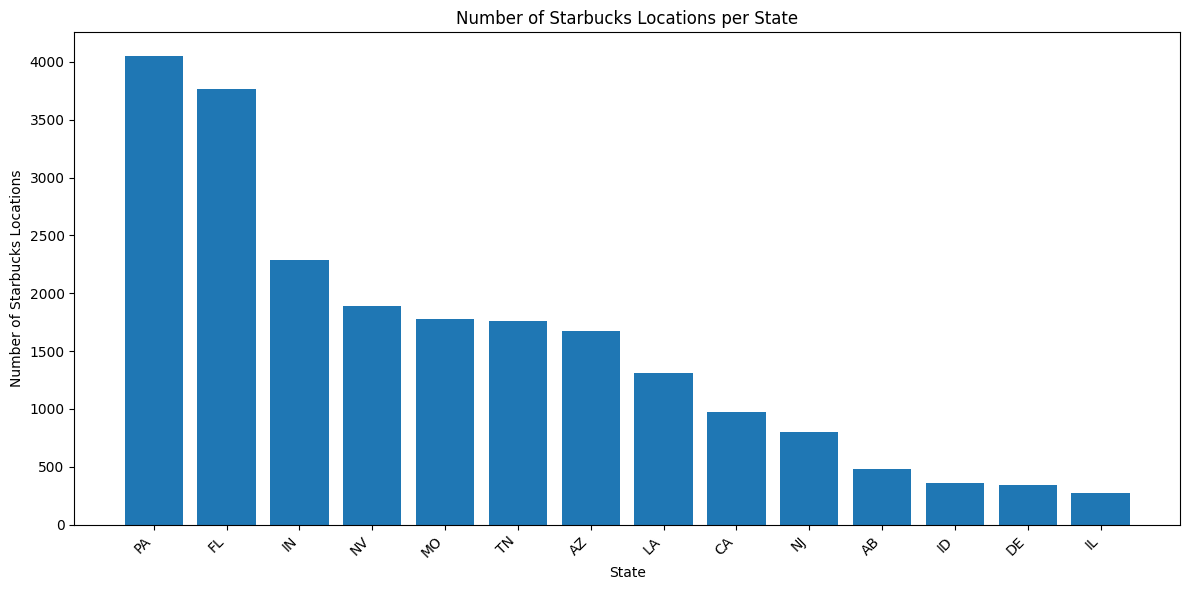

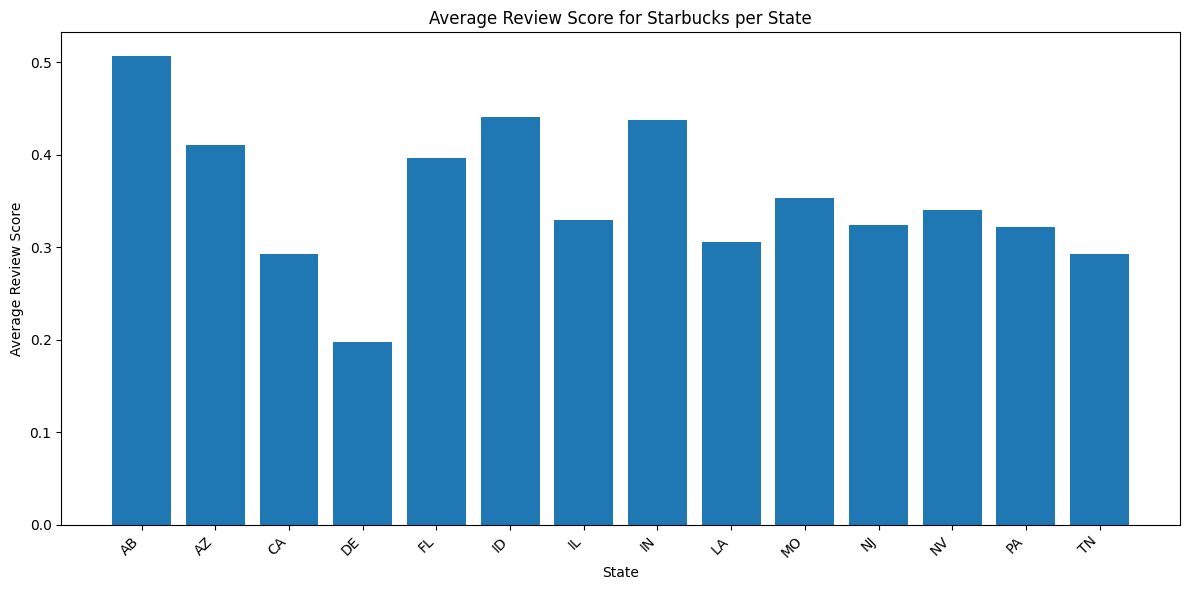

In [11]:
import matplotlib.pyplot as plt

# Assuming starbucks_reviews DataFrame is already created as in the previous code

# 1. Plot the number of Starbucks locations per state
starbucks_by_state = starbucks_reviews['state'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(starbucks_by_state.index, starbucks_by_state.values)
plt.xlabel("State")
plt.ylabel("Number of Starbucks Locations")
plt.title("Number of Starbucks Locations per State")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


# 2. Plot the average review score per state
# Extract compound sentiment scores
starbucks_reviews['compound_sentiment'] = starbucks_reviews['sentiment_scores'].apply(lambda x: x['compound'])

# Group by state and calculate the average compound sentiment
average_sentiment_by_state = starbucks_reviews.groupby('state')['compound_sentiment'].mean()

plt.figure(figsize=(12, 6))
plt.bar(average_sentiment_by_state.index, average_sentiment_by_state.values)
plt.xlabel("State")
plt.ylabel("Average Review Score")
plt.title("Average Review Score for Starbucks per State")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


## Data Evaluation

a. Our main questions are centered around Starbucks' customer experience performance (such as what the general sentiment is and how sentiment has changed over time); the review data we have is an excellent source of information that can answer these questions and provide us with valuable insights. \
<br>
b. We have a total of 21,739 reviews in our dataset, which is an appropriate sample size for our analysis. \
<br>
c. Two areas where bias may be a concern is the unbalanced ratio of positive to negative reviews and the number of reviews between states being unbalanced. \
<br>
d. The two biggest potential challenges of processing this data is the processing time some parts of the analysis will require (which we have partially alleviated by focusing on Starbucks) and finding specific and actionable solutions to insights with this data.

## Preliminary Data Exploration

In [12]:
# Group by state and calculate the average review score and composite sentiment score
state_level_stats = starbucks_reviews.groupby('state')[['stars_x', 'compound_sentiment']].mean()

# Rename columns for clarity
state_level_stats = state_level_stats.rename(columns={'stars_x': 'average_review_score', 'compound_sentiment': 'average_sentiment_score'})

# Display the results
state_level_stats

average_review_score  average_sentiment_score
state                                               
AB                 3.340909                 0.506922
AZ                 3.203582                 0.410648
CA                 2.956701                 0.293088
DE                 2.642229                 0.197182
FL                 3.178079                 0.396388
ID                 3.290503                 0.440747
IL                 3.018382                 0.329050
IN                 3.354867                 0.437341
LA                 2.892449                 0.305801
MO                 3.113739                 0.353687
NJ                 3.036386                 0.323500
NV                 2.953895                 0.339840
PA                 2.990375                 0.322297
TN                 2.867388                 0.292960

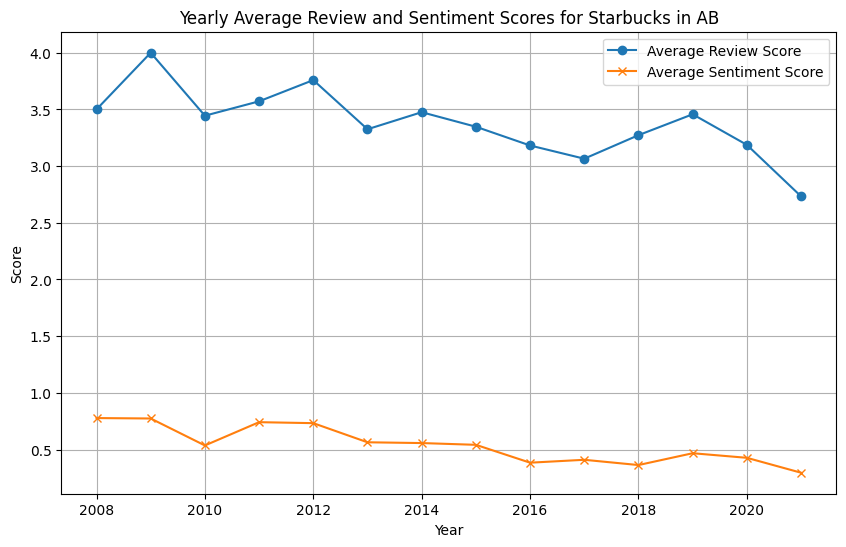

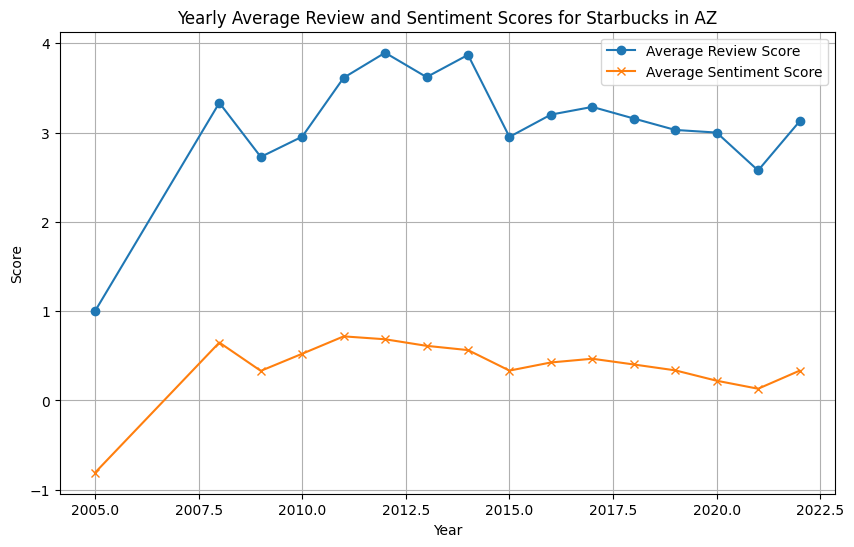

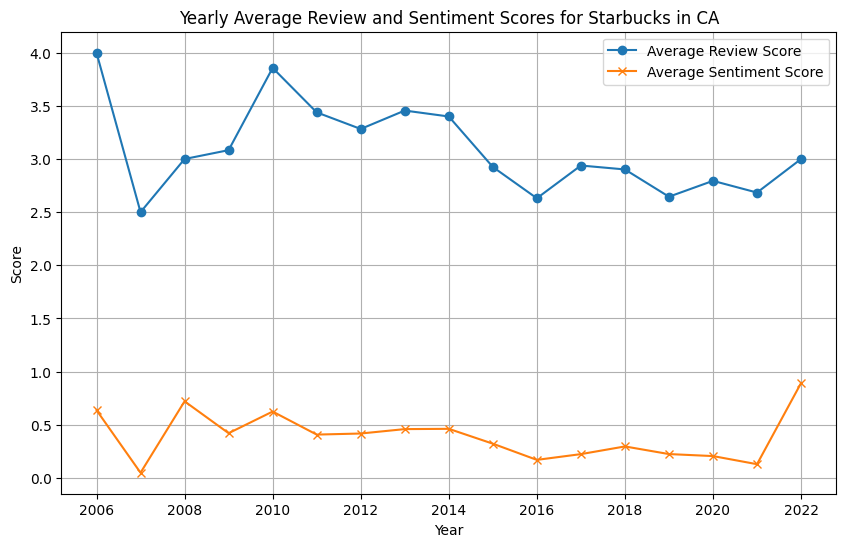

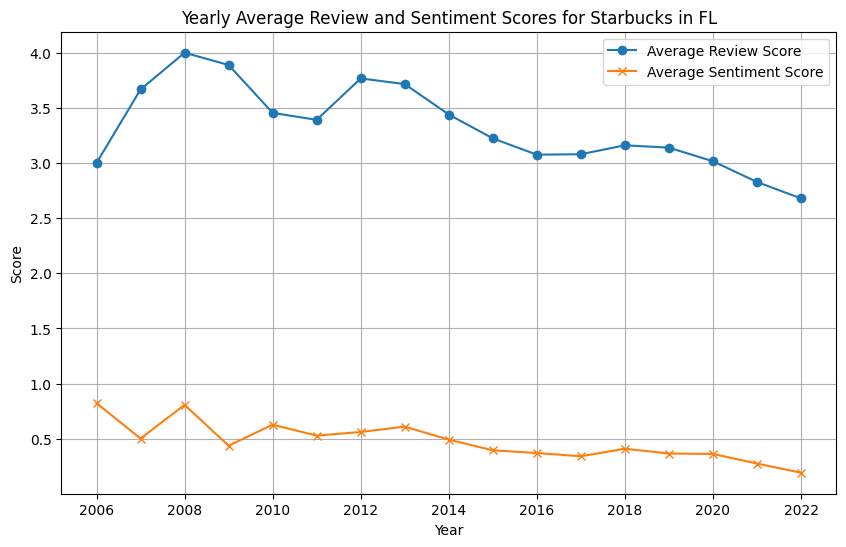

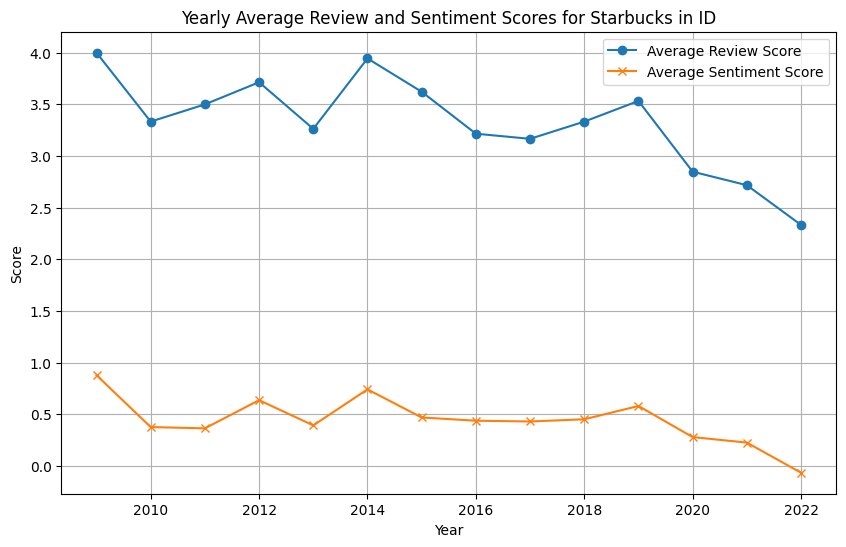

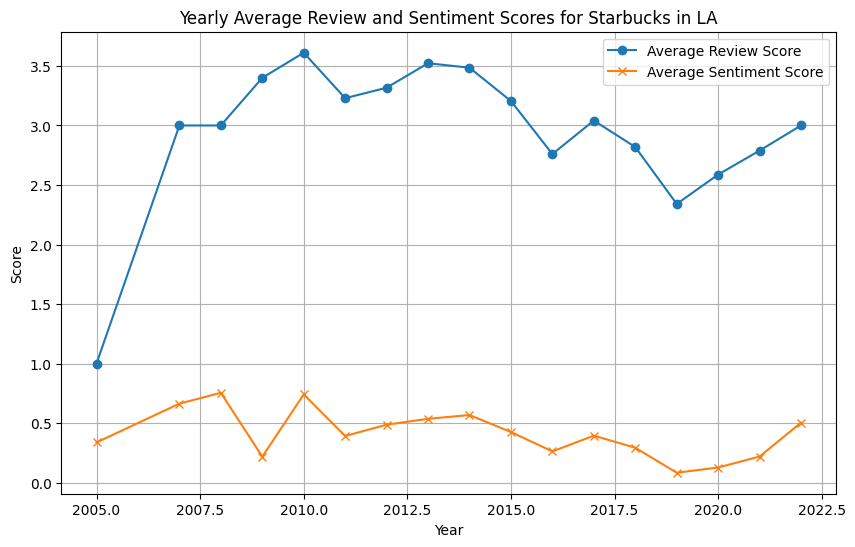

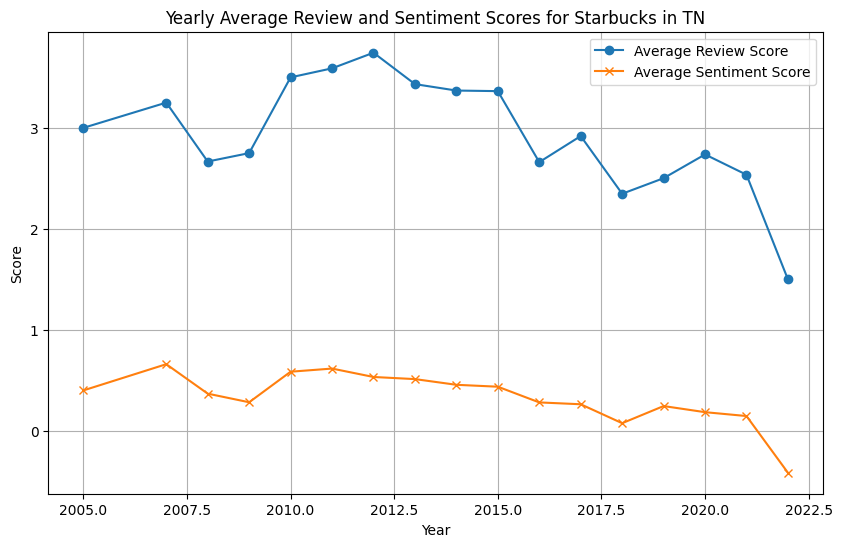

In [13]:
#Plot the average review and sentiment scores in each state by year

import matplotlib.pyplot as plt

# Assuming starbucks_reviews DataFrame is already loaded and processed as in the previous code

# Convert the 'date' column to datetime objects if not already done
starbucks_reviews['date'] = pd.to_datetime(starbucks_reviews['date'])

# Extract the year
starbucks_reviews['year'] = starbucks_reviews['date'].dt.year

# Group by state and year, then calculate the mean review and sentiment scores
yearly_state_stats = starbucks_reviews.groupby(['state', 'year'])[['stars_x', 'compound_sentiment']].mean().reset_index()

# Rename columns for clarity
yearly_state_stats = yearly_state_stats.rename(columns={'stars_x': 'average_review_score', 'compound_sentiment': 'average_sentiment_score'})

# Iterate through each state and create a plot
for state in yearly_state_stats['state'].unique():
    state_data = yearly_state_stats[yearly_state_stats['state'] == state]

    plt.figure(figsize=(10, 6))
    plt.plot(state_data['year'], state_data['average_review_score'], label='Average Review Score', marker='o')
    plt.plot(state_data['year'], state_data['average_sentiment_score'], label='Average Sentiment Score', marker='x')

    plt.xlabel('Year')
    plt.ylabel('Score')
    plt.title(f'Yearly Average Review and Sentiment Scores for Starbucks in {state}')
    plt.legend()
    plt.grid(True)
    plt.show()


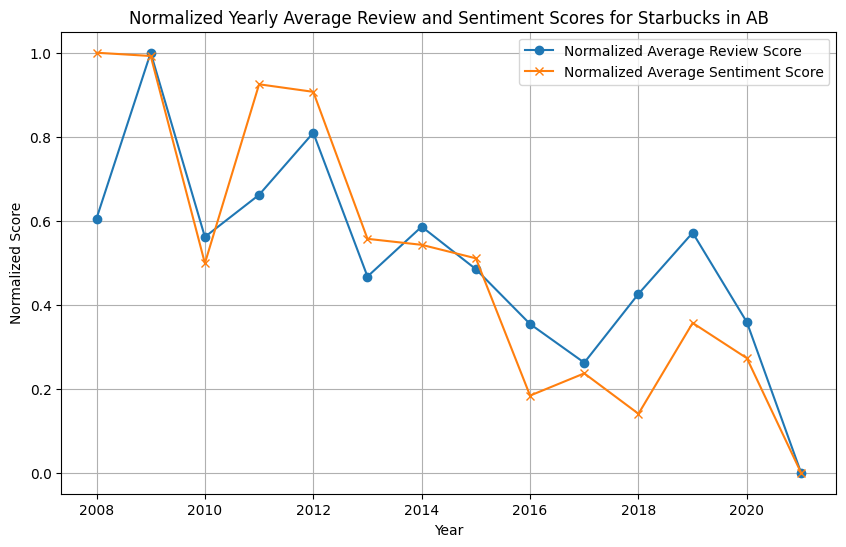

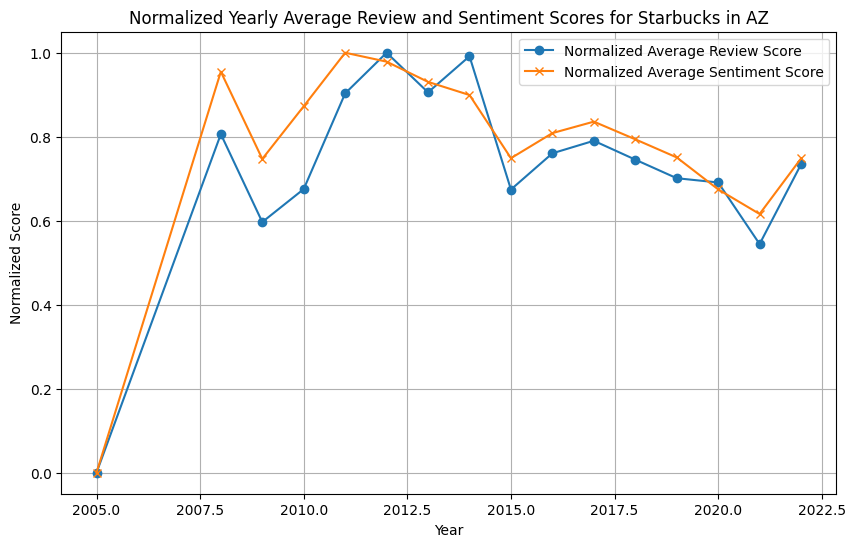

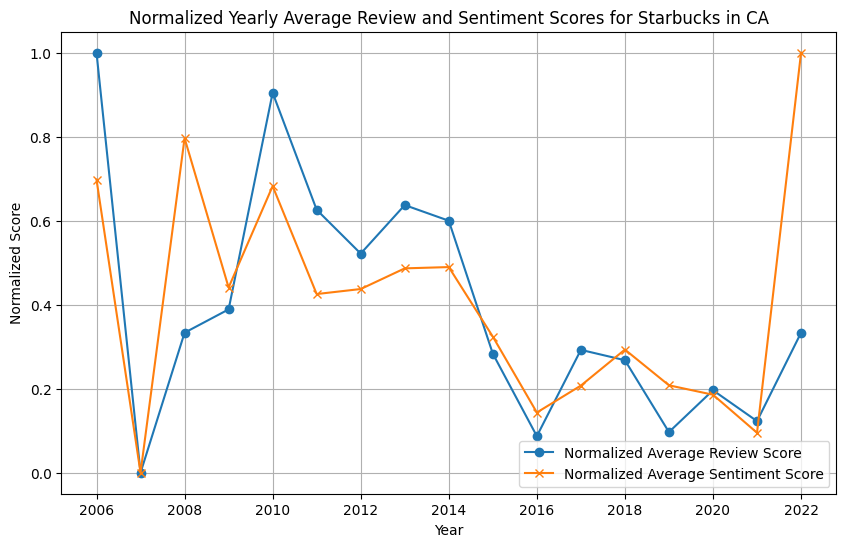

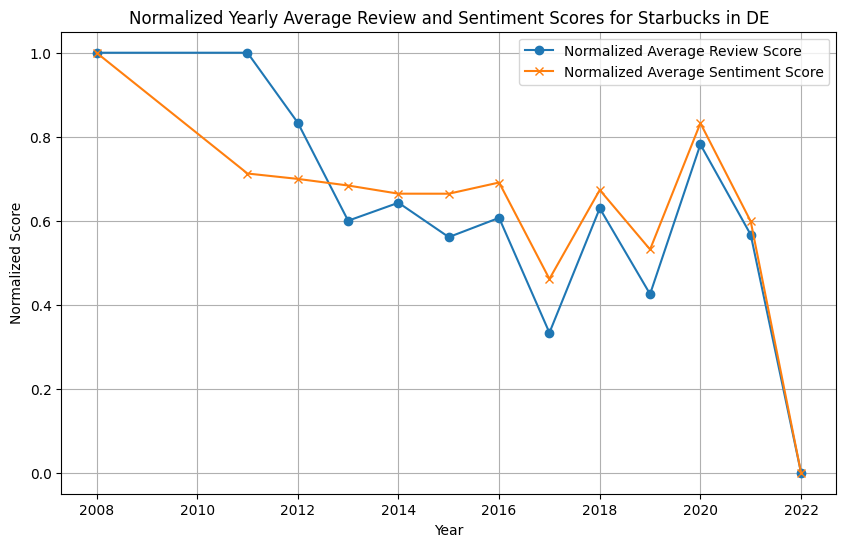

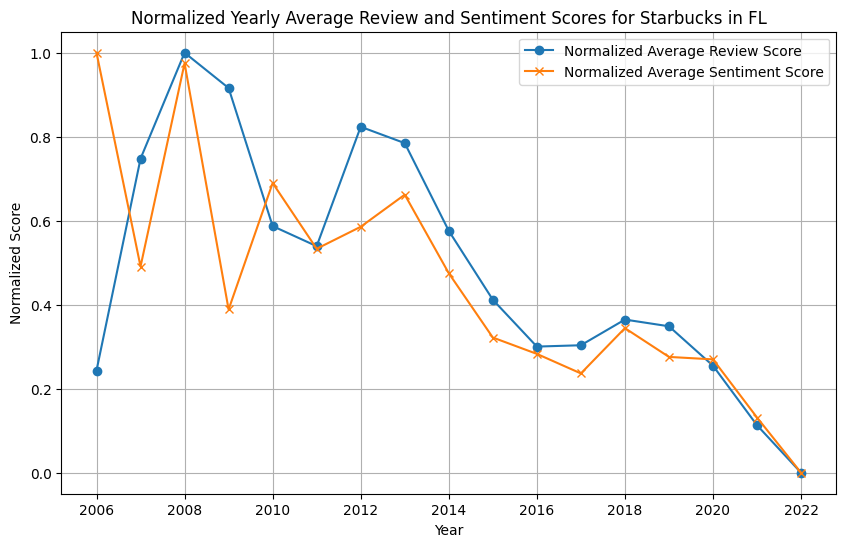

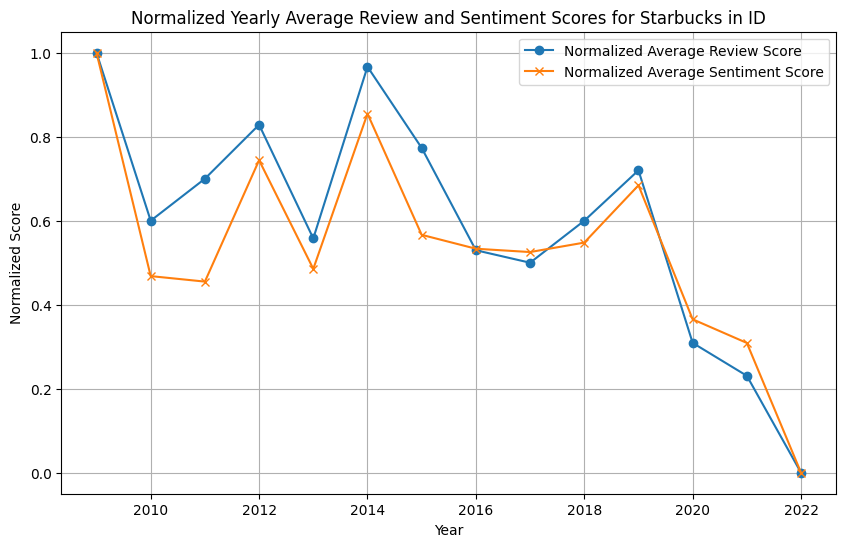

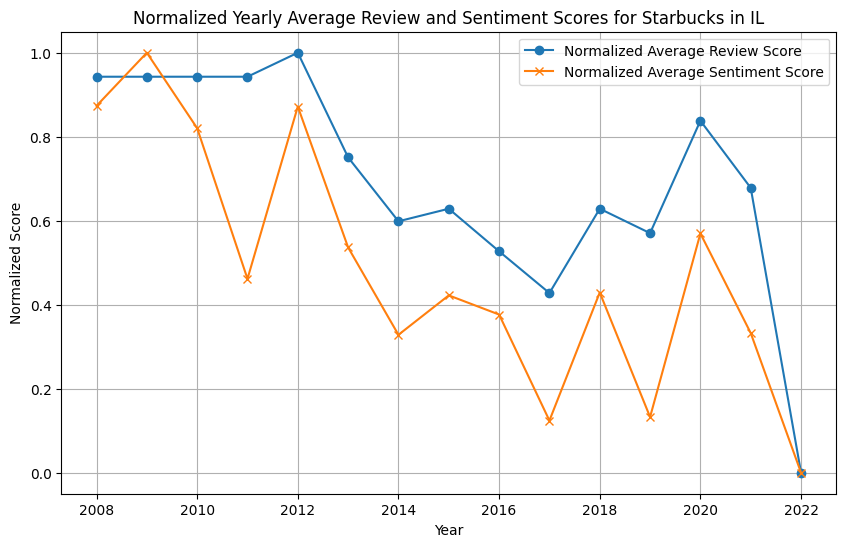

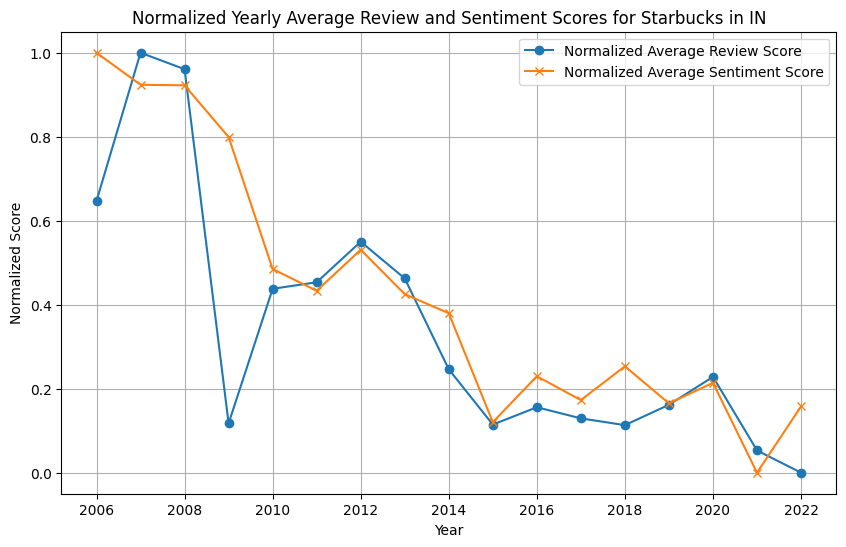

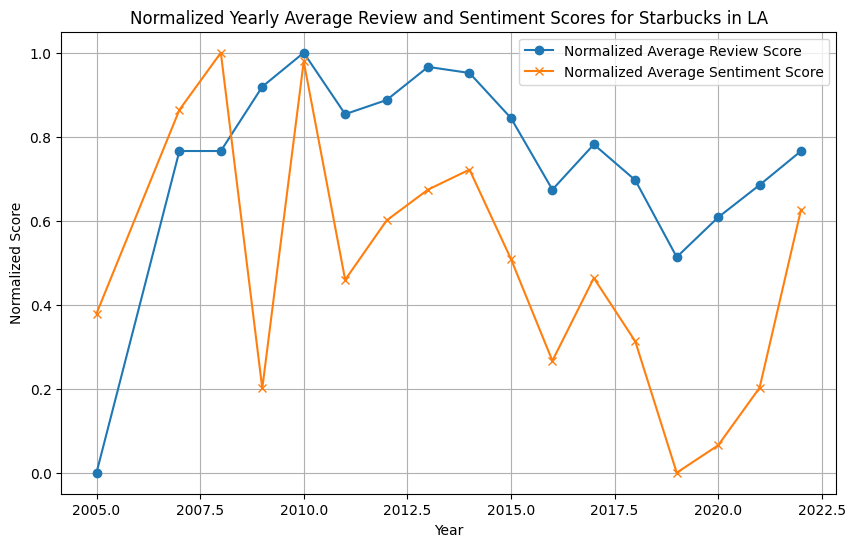

In [14]:
# Normalized average review and normalized sentiment scores in each state by year

import matplotlib.pyplot as plt

# Assuming yearly_state_stats DataFrame is already created as in the previous code

# Normalize the scores for each state
for state in yearly_state_stats['state'].unique():
    state_data = yearly_state_stats[yearly_state_stats['state'] == state].copy()  # Create a copy to avoid SettingWithCopyWarning

    # Normalize average_review_score
    state_data['normalized_average_review_score'] = (state_data['average_review_score'] - state_data['average_review_score'].min()) / (state_data['average_review_score'].max() - state_data['average_review_score'].min())

    # Normalize average_sentiment_score
    state_data['normalized_average_sentiment_score'] = (state_data['average_sentiment_score'] - state_data['average_sentiment_score'].min()) / (state_data['average_sentiment_score'].max() - state_data['average_sentiment_score'].min())


    plt.figure(figsize=(10, 6))
    plt.plot(state_data['year'], state_data['normalized_average_review_score'], label='Normalized Average Review Score', marker='o')
    plt.plot(state_data['year'], state_data['normalized_average_sentiment_score'], label='Normalized Average Sentiment Score', marker='x')

    plt.xlabel('Year')
    plt.ylabel('Normalized Score')
    plt.title(f'Normalized Yearly Average Review and Sentiment Scores for Starbucks in {state}')
    plt.legend()
    plt.grid(True)
    plt.show()


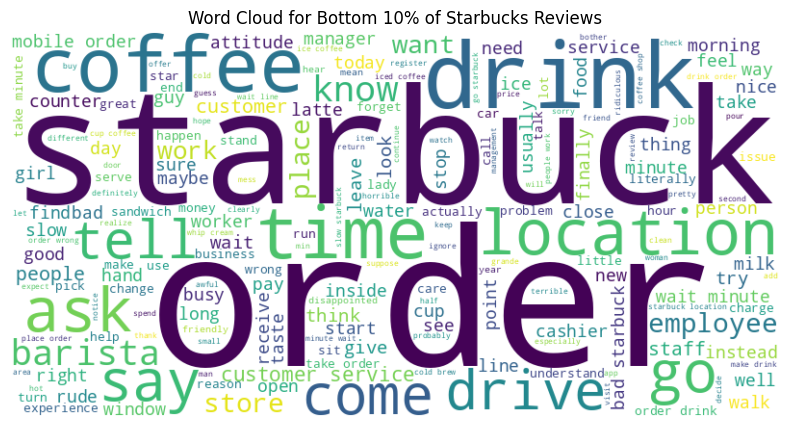

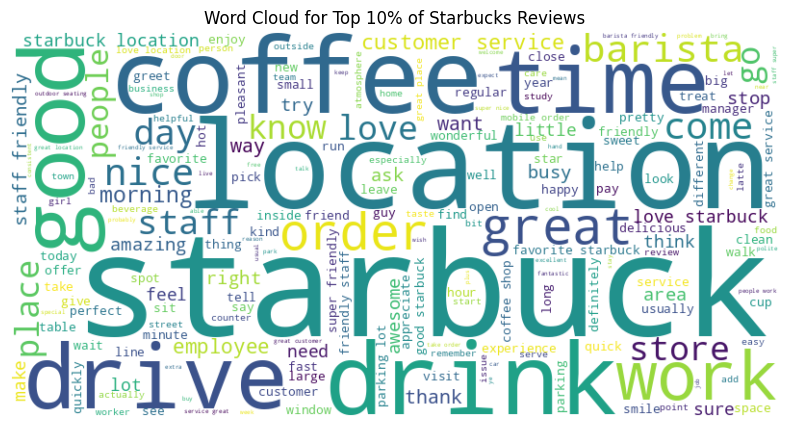

In [15]:
# Word cloud for the top 10% of Starbucks reviews going by review score in the 'star_x' column as well as for the bottom 10% of reviews

!pip install wordcloud

from wordcloud import WordCloud

# Calculate the 10th and 90th percentiles of 'star_x'
percentile_10 = starbucks_reviews['stars_x'].quantile(0.10)
percentile_90 = starbucks_reviews['stars_x'].quantile(0.90)

# Filter reviews based on percentiles
bottom_10_reviews = starbucks_reviews[starbucks_reviews['stars_x'] <= percentile_10]
top_10_reviews = starbucks_reviews[starbucks_reviews['stars_x'] >= percentile_90]

# Function to generate and display word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


# Generate word clouds
generate_wordcloud(bottom_10_reviews['processed'], 'Word Cloud for Bottom 10% of Starbucks Reviews')
generate_wordcloud(top_10_reviews['processed'], 'Word Cloud for Top 10% of Starbucks Reviews')


## Proposed Solution

From our prelimnary data exploration, we have found that the average review scores and customer sentiment has been declining at Starbucks in most states, with the exception of Arizona (AZ) and Louisiana (LA) where we see notably higher averages.

Our next step is to investivagte the differences in reviews between AZ, LA, and the others to identify why these customers feel the way that they do, examine what impact this has had (if any) on Starbucks' business, and where Starbucks needs to improve to boost customer sentiment.

To do so, We will use methods such as language modeling to create aggregate summaries based on the good and bad reviews reviews in each state to compare more precisely identify Starbucks' strengths and weaknesses.

We also want to use machine learning to perform regression on the sentiment data to figure what features are important in determining sentiment and  predicting future customer sentiment.

# BERT Topic Modeling

In [16]:
data = starbucks_df
data.head()

review_id                 user_id             business_id  \
0  ULzbgT5SPThiMOoo4a_Adw  veBX5roHQLNnQ1rTtNh_gg  aJvxWyQIG5OLfBw3qAe8xA   
1  RXqhxbAuPPSNs-oyJJyOgw  zZygOZLNyJX5nDqKrwa4HQ  MjZQqZAmJeMco_Vq-Y9h-g   
2  LuMkMBAUV1B-2dm2pqSBWw  0SpK7eVn5TrpyQKPaohVBw  u7MJKcNdZXYyTeb67vD5jw   
3  Z0Jt8xf0XqFD_xjPPm_d0g  IVnrNZ8npRx04jkNp6-ERA  saJFbz12EnzanelpD8_xXQ   
4  NoPOfj7gC1l48dC0XH7Spw  tgP2gKsf3O9MyuLuolv2oQ  KiE0h68HGOO7ZXAqkMBdiw   

   stars_x  useful  funny  cool  \
0        2       0      0     0   
1        4       0      0     0   
2        4       1      0     0   
3        2       0      0     0   
4        1       0      1     0   

                                                text                date  \
0  Ordered Caramel frappe at Drive thru, BIG MIST... 2017-12-29 19:38:31   
1  Drum-roll please! Review #100 coming right up!... 2014-02-05 19:38:24   
2  We stopped here for my Chai and Hubby's coffee... 2017-02-09 04:35:39   
3  There's been three times that I've ordered a g... 2016-08-25 14:08:18   
4  I went in when they had 4 people working, wait... 2016-01-30 01:10:42   

        name  ... stars_y review_count is_open  \
0  Starbucks  ...     3.0           65       1   
1  Starbucks  ...     3.0           33       1   
2  Starbucks  ...     1.5           17       1   
3  Starbucks  ...     2.5           95       1   
4  Starbucks  ...     2.5           35       0   

                                          attributes  \
0  {'BikeParking': 'False', 'RestaurantsPriceRang...   
1  {'OutdoorSeating': 'True', 'WiFi': "u'free'", ...   
2  {'RestaurantsPriceRange2': '2', 'BusinessAccep...   
3  {'OutdoorSeating': 'True', 'RestaurantsPriceRa...   
4  {'BusinessAcceptsCreditCards': 'True', 'Outdoo...   

                        categories  \
0  Restaurants, Coffee & Tea, Food   
1               Food, Coffee & Tea   
2               Food, Coffee & Tea   
3               Food, Coffee & Tea   
4               Food, Coffee & Tea   

                                               hours  \
0  {'Monday': '5:0-21:0', 'Tuesday': '5:0-21:0', ...   
1  {'Monday': '5:30-19:0', 'Tuesday': '5:30-19:0'...   
2  {'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ...   
3  {'Monday': '5:0-21:0', 'Tuesday': '5:0-21:0', ...   
4                                                NaN   

                                           processed  \
0  order caramel frappe drive , big mistake ! tak...   
1  drum - roll ! review # 100 come right ! \n\n c...   
2  stop chai hubby coffee caffeine mania . line g...   
3  time order green tea lemonade get peach tea le...   
4  go 4 people work , wait 15 minute tea latte co...   

                                    sentiment_scores  compound_sentiment  year  
0  {'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'comp...             -0.5307  2017  
1  {'neg': 0.057, 'neu': 0.724, 'pos': 0.219, 'co...              0.9863  2014  
2  {'neg': 0.018, 'neu': 0.885, 'pos': 0.097, 'co...              0.7544  2017  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...              0.0000  2016  
4  {'neg': 0.172, 'neu': 0.828, 'pos': 0.0, 'comp...             -0.9311  2016  

[5 rows x 26 columns]

In [17]:
# Create a new column containing the length each headline text
data["text_len"] = data["text"].apply(lambda x : len(x.split()))
data_text = data[['text']]

In [18]:
print("The longest headline has: {} words".format(data.text_len.max()))

The longest headline has: 949 words


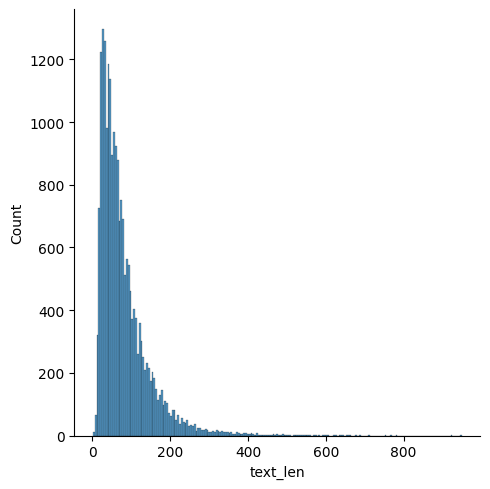

In [19]:
# Visualize the length distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(data.text_len, kde=False)

In [20]:
for idx in data.sample(3).index:
    headline = data.iloc[idx]
    print("Headline #{}:".format(idx))
    print("Publication date: {}".format(headline.date))
    print("Text: {}\n".format(headline.text))

Headline #14669:
Publication date: 2021-08-21 13:19:36
Text: I'll agree with the previous reviewer that the morning staff are great. Hopefully this place will get all shifts up to speed. It is a great, cozy location.

Headline #1466:
Publication date: 2019-01-20 23:05:12
Text: I frequent this Starbucks to study. It is a larger Starbucks than most in Tampa area (I've been to 6+ recently to study); it has over 6 'reading' chairs (no table), 6+ two-seater tables with one side of booth seating and your standard long table with 8-9 seats. There is outdoor seating as well.

The staff is friendly and competent. I've had a few experiences at other Starbucks locations where, in a slow period, they're joking / messing around to the extent that it's disruptive to people trying to read or study. I've been to this location over a dozen times total and I've never had that experience here.

Five star location for sure, I'd highly recommend coming in to either grab a quick drink or stay a while.

Head

In [21]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [22]:
%%time
from bertopic import BERTopic
model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 7)
headline_topics, _ = model.fit_transform(data.text)

2025-03-05 21:36:00,113 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.04k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/680 [00:00<?, ?it/s]

2025-03-05 21:45:32,926 - BERTopic - Embedding - Completed ✓
2025-03-05 21:45:32,927 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-05 21:46:31,158 - BERTopic - Dimensionality - Completed ✓
2025-03-05 21:46:31,161 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-05 21:46:39,577 - BERTopic - Cluster - Completed ✓
2025-03-05 21:46:39,594 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-05 21:46:41,284 - BERTopic - Representation - Completed ✓


CPU times: user 10min 45s, sys: 27.1 s, total: 11min 12s
Wall time: 11min 36s


In [23]:
from umap import UMAP

# UMAP (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique used in conjunction with BERTopic to visualize high-dimensional data in a lower-dimensional space.
# BERTopic employs UMAP to project the embeddings of documents into a 2D or 3D space, making it easier to interpret and explore the relationships between topics.

In [24]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
# Initiate BERTopic
model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
headline_topics, probabilities = model.fit_transform(data.text)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [26]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head()

Number of topics: 153


Topic  Count                               Name  \
0     -1  13670                   -1_the_and_to_my   
1      0    611     0_best_favorite_love_starbucks   
2      1    348      1_baristas_barista_always_are   
3      2    338  2_bathroom_dirty_please_bathrooms   
4      3    294              3_parking_lot_is_park   

                                      Representation  \
0      [the, and, to, my, was, is, of, it, this, in]   
1  [best, favorite, love, starbucks, always, are,...   
2  [baristas, barista, always, are, friendly, gre...   
3  [bathroom, dirty, please, bathrooms, toilet, f...   
4  [parking, lot, is, park, starbucks, the, you, ...   

                                 Representative_Docs  
0  [I am a regular at Starbucks.  5 days a week I...  
1  [My absolute favorite starbucks. The baristas ...  
2  [Always excellent service ! I stop here often ...  
3  [Place is dirty. Tables and chairs and floors ...  
4  [This a very friendly and clean Starbucks.  My...

In [27]:
a_topic = freq.iloc[1]["Topic"] # Select the 1st topic
model.get_topic(a_topic) # Show the words and their c-TF-IDF scores

[('best', 0.014645802742505758),
 ('favorite', 0.011955220288886272),
 ('love', 0.011954873793202737),
 ('starbucks', 0.011851574105379509),
 ('always', 0.01140313176043078),
 ('are', 0.00935070987568669),
 ('friendly', 0.009319756645638945),
 ('great', 0.008356057108125628),
 ('is', 0.00807083417862611),
 ('my', 0.007729681492910053)]

In [28]:
model.visualize_barchart(top_n_topics=6)

In [29]:
#embed c-TF-IDF representation of the topics in 2D using UMAP and then visualize the two dimensions
model.visualize_topics(top_n_topics=6)

In [30]:
#show all hierarchy
#model.visualize_hierarchy()

#show top 6 topics
model.visualize_hierarchy(top_n_topics=6)

In [31]:
model.visualize_heatmap(top_n_topics=30)

In [32]:
print('Row numbers: '+ str(len(probabilities))+' and Topic probabilities in each Row: ' +str(len(probabilities[0])))
# To interpret the output: there are 21,739 rows (documents) and 152 topic probabilities per row, suggesting a topic model with 152 topics.

Row numbers: 21739 and Topic probabilities in each Row: 152


In [33]:
#show Distribution of topic probabilities in row 2
model.visualize_distribution(probabilities[3],0.0002) #min_probability=0.0002

In [34]:
#Transfer to time format
#data['tweet_created_format']=data['tweet_created'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
data['date_format'] = pd.to_datetime(data['date'], errors='coerce')

#Create topics over time
topics_over_time = model.topics_over_time(data.text, timestamps=data.date_format, nr_bins=20)

In [35]:
model.visualize_topics_over_time(topics_over_time, topics = [0, 1, 2, 3, 4, 5])

In [36]:
# Our focus is on topics 1 through 5 (we exclude topic 0 for our purposes)

docs=data['text']
classes=data['stars_x']

#Create topics per class
topics_per_class = model.topics_per_class(docs, classes=classes)

model.visualize_topics_per_class(topics_per_class)

In [37]:
# Select most 3 similar topics
similar_topics, similarity = model.find_topics("dirty", top_n = 3)

In [38]:
similar_topics

[2, 62, 44]

In [39]:
most_similar = similar_topics[0]
print("The Most Similar Topic Info: \n{}".format(model.get_topic(most_similar)))
print("Similarity Score: {}".format(similarity[0]))

The Most Similar Topic Info: 
[('bathroom', 0.02273032784069968), ('dirty', 0.019162040205431486), ('please', 0.015154121939460372), ('bathrooms', 0.012365799891371921), ('toilet', 0.012037273153635215), ('floor', 0.011569748011723231), ('filthy', 0.011126508700233805), ('restroom', 0.010908500223459084), ('clean', 0.010836943506913136), ('floors', 0.009417887288617513)]
Similarity Score: 0.30688443779945374


# Additional Analysis

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [41]:
# Use if reading in file from Google Drive

starbucks_file_path = '/content/drive/MyDrive/Yelp Reviews/starbucks_data.csv'

df2 = pd.read_csv(starbucks_file_path)

In [42]:
# Load the Starbucks data

#starbucks_file_path = '/content/drive/MyDrive/Yelp Reviews/starbucks_data.csv'

# Use this code if working with local file
#starbucks_file_path = 'starbucks_data.csv'

#df2 = pd.read_csv(starbucks_file_path)

# Print the column names to check for typos or incorrect names
print(df2.columns)

# Data Preprocessing
# Make sure 'review_text' matches the actual column name in your DataFrame
# If the column name is different, update it accordingly. For example, if the column is named 'Review Text', use:
# df = df.dropna(subset=['Review Text'])
df2 = df2.dropna(subset=['text'])  # Drop missing reviews
df2['text'] = df2['text'].astype(str)

Index(['review_id', 'user_id', 'business_id', 'stars_x', 'useful', 'funny',
       'cool', 'text', 'date', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_y', 'review_count',
       'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')


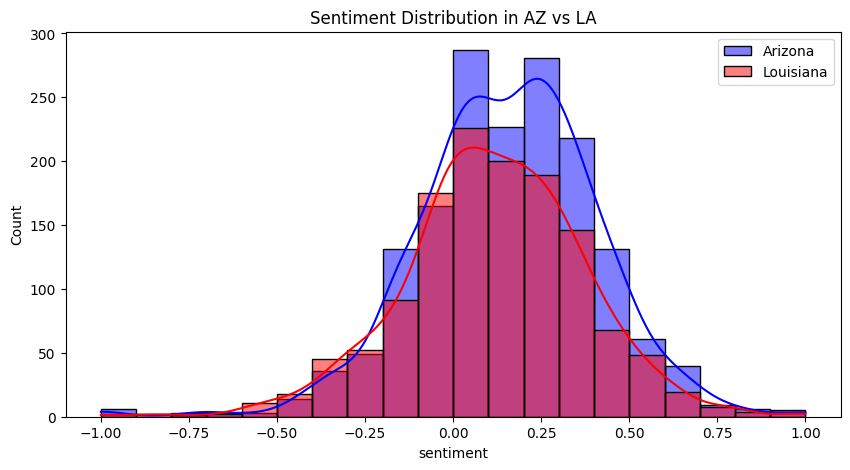

In [43]:
# Sentiment Analysis
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df2['sentiment'] = df2['text'].apply(get_sentiment)

# Sentiment distribution for AZ and LA
az_reviews = df2[df2['state'] == 'AZ']['sentiment']
la_reviews = df2[df2['state'] == 'LA']['sentiment']

plt.figure(figsize=(10, 5))
sns.histplot(az_reviews, bins=20, kde=True, color='blue', label='Arizona')
sns.histplot(la_reviews, bins=20, kde=True, color='red', label='Louisiana')
plt.legend()
plt.title('Sentiment Distribution in AZ vs LA')
plt.show()

In [44]:
# Topic Modeling using LDA
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X = vectorizer.fit_transform(df2['text'])
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

# Display top words in each topic
words = vectorizer.get_feature_names_out()
topics = {i: [words[idx] for idx in topic.argsort()[:-6:-1]] for i, topic in enumerate(lda.components_)}
print("Top words in each topic:", topics)

Top words in each topic: {0: ['starbucks', 'friendly', 'great', 'location', 'staff'], 1: ['drink', 'coffee', 'ordered', 'starbucks', 'order'], 2: ['order', 'minutes', 'line', 'starbucks', 'drive']}


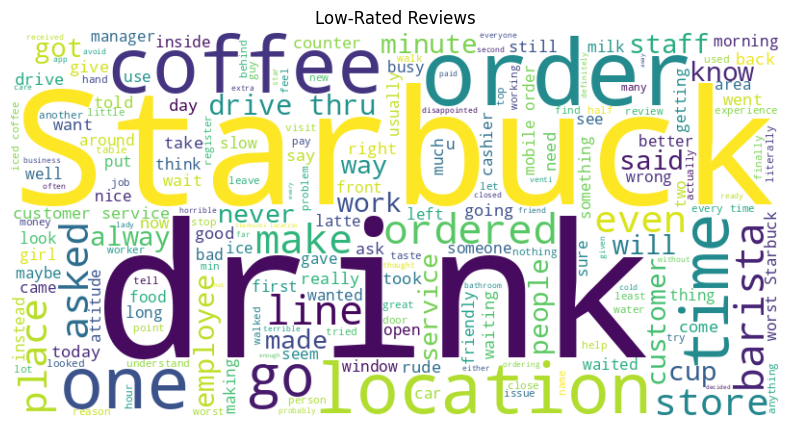

In [45]:
# Word Cloud for High-Rated vs Low-Rated Reviews
def plot_wordcloud(subset, title):
    text = ' '.join(subset)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

high_rated = df2[df2['stars_x'] >= 4]['text']
low_rated = df2[df2['stars_x'] <= 2]['text']
plot_wordcloud(high_rated, 'High-Rated Reviews')
plot_wordcloud(low_rated, 'Low-Rated Reviews')

In [46]:
# Geographic & Keyword Analysis - High-Frequency Words in High-Rated and Low-Rated Reviews
high_rated_texts = high_rated.str.cat(sep=' ')
low_rated_texts = low_rated.str.cat(sep=' ')

vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
high_tf_idf = vectorizer.fit_transform([high_rated_texts])
low_tf_idf = vectorizer.fit_transform([low_rated_texts])

high_keywords = vectorizer.get_feature_names_out()
low_keywords = vectorizer.get_feature_names_out()

print("High-Frequency Words in High-Rated Reviews:", high_keywords)
print("High-Frequency Words in Low-Rated Reviews:", low_keywords)


High-Frequency Words in High-Rated Reviews: ['asked' 'coffee' 'customer' 'don' 'drink' 'drinks' 'drive' 'just' 'like'
 'line' 'location' 'make' 'minutes' 'order' 'ordered' 'people' 'service'
 'starbucks' 'time' 've']
High-Frequency Words in Low-Rated Reviews: ['asked' 'coffee' 'customer' 'don' 'drink' 'drinks' 'drive' 'just' 'like'
 'line' 'location' 'make' 'minutes' 'order' 'ordered' 'people' 'service'
 'starbucks' 'time' 've']


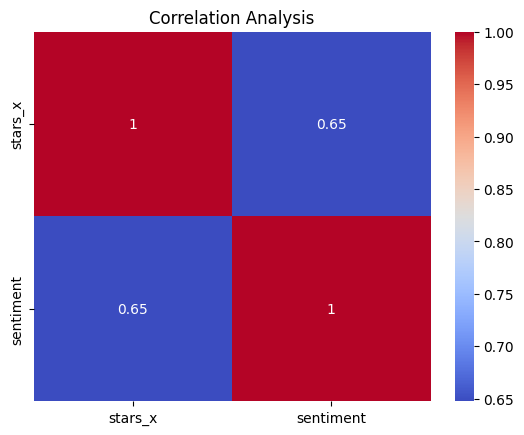

In [47]:
# Correlation Analysis
numeric_cols = ['stars_x', 'sentiment']
correlation_matrix = df2[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()


In [48]:
# Analyzing Review Length and Format Effect on Good Reviews
df2['review_length'] = df2['text'].apply(len)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['stars_x'], y=df2['review_length'])
plt.title('Review Length vs. stars_x')
plt.xlabel('stars_x')
plt.ylabel('Review Length')
plt.show()

In [49]:
# Predictive Modeling - Sentiment Classification
df2['sentiment_label'] = df2['sentiment'].apply(lambda x: 1 if x > 0 else 0)  # Positive (1) vs Negative (0)
X_train, X_test, y_train, y_test = train_test_split(X, df2['sentiment_label'], test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.859245630174793
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.69      0.74      1241
           1       0.88      0.93      0.90      3107

    accuracy                           0.86      4348
   macro avg       0.84      0.81      0.82      4348
weighted avg       0.86      0.86      0.86      4348



##TF-IDF vectorization on the whole dataset

In [50]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

# 1. Load your dataset (assuming the text column is called 'text')
df3 = df2

# 2. Extract the text data
text_data = df3['text']  # Replace 'text' with your actual column name if it's different

token = RegexpTokenizer(r'[a-zA-Z]+')

# 3. Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize, max_features = 1000)

# 4. Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(text_data)

# 5. Convert the result into a DataFrame for easy interpretation
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# 6. Display or save the result (optional)
print(tfidf_df.head())

# Optionally, save the TF-IDF result to a CSV file
#tfidf_df.to_csv('tfidf_output.csv', index=False)

   able  absolute  absolutely  access  accommodating  accurate  act  actually  \
0   0.0       0.0         0.0     0.0            0.0       0.0  0.0       0.0   
1   0.0       0.0         0.0     0.0            0.0       0.0  0.0       0.0   
2   0.0       0.0         0.0     0.0            0.0       0.0  0.0       0.0   
3   0.0       0.0         0.0     0.0            0.0       0.0  0.0       0.0   
4   0.0       0.0         0.0     0.0            0.0       0.0  0.0       0.0   

   add  added  ...  wrong  yeah  year  years  yelp  yes  yesterday  young  \
0  0.0    0.0  ...    0.0   0.0   0.0    0.0   0.0  0.0        0.0    0.0   
1  0.0    0.0  ...    0.0   0.0   0.0    0.0   0.0  0.0        0.0    0.0   
2  0.0    0.0  ...    0.0   0.0   0.0    0.0   0.0  0.0        0.0    0.0   
3  0.0    0.0  ...    0.0   0.0   0.0    0.0   0.0  0.0        0.0    0.0   
4  0.0    0.0  ...    0.0   0.0   0.0    0.0   0.0  0.0        0.0    0.0   

   yummy  zero  
0    0.0   0.0  
1    0.0   0.0  

In [51]:
df3['text'].fillna('', inplace=True)  # Replace NaN values in 'text' column with an empty string

In [52]:
# Step 2: Import the RegexpTokenizer (if not already imported)

from nltk.tokenize import RegexpTokenizer
# This import is used to create a tokenizer that extracts only alphabetic tokens.


In [53]:
# Step 3: Enhance TF-IDF Vectorizer Settings and Display Top Terms

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

# Initialize the tokenizer to extract alphabetic tokens
token = RegexpTokenizer(r'[a-zA-Z]+')

# Re-initialize the TfidfVectorizer with advanced parameters:
# - Remove English stop words
# - Include unigrams and bigrams (1,2)
# - Use the custom tokenizer
# - Limit to top 1000 features
# - Ignore terms in more than 80% of documents (max_df)
# - Ignore terms in fewer than 5 documents (min_df)
# - Apply sublinear term frequency scaling and L2 normalization
vectorizer = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1,2),
    tokenizer=token.tokenize,
    max_features=1000,
    max_df=0.8,
    min_df=5,
    sublinear_tf=True,
    norm='l2'
)

# Fit and transform the text data using the updated vectorizer
tfidf_matrix = vectorizer.fit_transform(df['text'])

# Retrieve the feature names (i.e., the terms)
feature_names = vectorizer.get_feature_names_out()

# Calculate the total TF-IDF score for each feature across all documents and sort them in descending order
sorted_items = sorted(zip(tfidf_matrix.sum(axis=0).A1, feature_names), reverse=True)

# Print the top 20 terms with the highest TF-IDF scores
print(sorted_items[:20])


[(1205.714378929922, 'starbucks'), (868.030445055966, 's'), (847.8254504891229, 'coffee'), (841.2030559732993, 't'), (803.2112850789077, 'location'), (731.3658355945123, 'service'), (667.1719384805034, 'order'), (655.8240926438557, 'drink'), (655.5666861055854, 'staff'), (648.7520114493221, 'drive'), (638.3019848911283, 'friendly'), (629.1234729340187, 'time'), (584.2714819189421, 'great'), (582.5406434414648, 'just'), (570.8793156503315, 'like'), (527.3230980384586, 'good'), (511.80811371406236, 'place'), (507.66029707451384, 'drinks'), (493.0386808390278, 've'), (476.4055529770933, 'nice')]


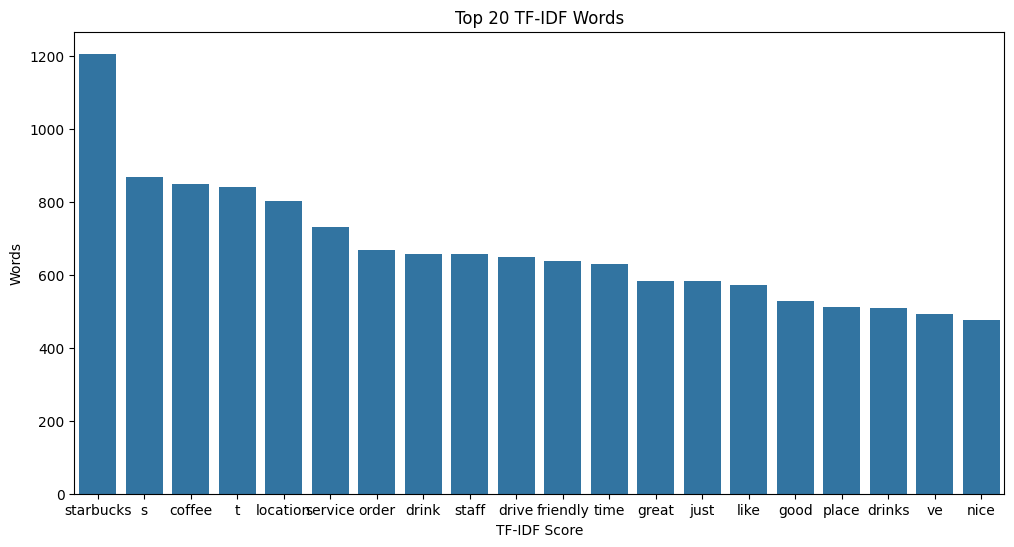

In [54]:
# Step 4: Visualize Top 20 TF-IDF Terms with a Bar Plot

import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 20 terms from the sorted list
top_words = sorted_items[:20]
# Unzip the list of tuples into separate sequences for words and their scores
words, scores = zip(*top_words)

# Create a figure with specified dimensions
plt.figure(figsize=(12,6))

# Plot a horizontal bar chart with Seaborn: x-axis as TF-IDF scores and y-axis as words
sns.barplot(x=scores, y=words)

# Label the axes and add a title to the plot
plt.xlabel("TF-IDF Score")
plt.ylabel("Words")
plt.title("Top 20 TF-IDF Words")

# Display the plot
plt.show()


### **Key Takeaways from the TF-IDF Chart:**
1. **Top Word:** *"Starbucks"* is the most important, appearing frequently in reviews.
2. **Common Themes:** *Coffee, service, order, location, staff*—highlighting key customer concerns.
3. **Sentiment Indicators:** Words like *"friendly," "great," "good," "nice"* suggest positive service mentions.

In [55]:
# Step 5: Reduce Dimensionality using Truncated SVD for LSA

from sklearn.decomposition import TruncatedSVD

# Initialize TruncatedSVD to reduce the TF-IDF matrix to 100 components (latent features)
lsa = TruncatedSVD(n_components=100)

# Fit the SVD model to the TF-IDF matrix and transform the data to the lower-dimensional space
lsa_matrix = lsa.fit_transform(tfidf_matrix)


In [56]:
# Step 5 (Alternate): Cluster Documents using KMeans

from sklearn.cluster import KMeans

# Define the number of clusters to form
num_clusters = 5

# Initialize the KMeans clustering model with 5 clusters and a fixed random state for reproducibility
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the KMeans model to the TF-IDF matrix and predict the cluster for each document
clusters = kmeans.fit_predict(tfidf_matrix)

# Add the cluster labels as a new column in the original DataFrame
df3['cluster'] = clusters

# Print the first few rows of the DataFrame to see the text and its corresponding cluster label
print(df3[['text', 'cluster']].head())



                                                text  cluster
0  Ordered Caramel frappe at Drive thru, BIG MIST...        3
1  Drum-roll please! Review #100 coming right up!...        2
2  We stopped here for my Chai and Hubby's coffee...        2
3  There's been three times that I've ordered a g...        3
4  I went in when they had 4 people working, wait...        3


In [57]:
from sklearn.svm import SVC

model = SVC(kernel='linear')  # Linear Kernel is good for text data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred))


SVM Accuracy: 0.8739650413983441


In [58]:
# Step 6: Split Data into Training and Testing Sets for Supervised Learning

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets:
# - X: TF-IDF feature matrix
# - y: Target variable from 'stars_x' column (adjust column name as needed)
# - test_size=0.2 reserves 20% of data for testing
# - random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix,
    df3['stars_x'] - 1,  # Subtract 1 from 'stars_x' to make it 0-4
    test_size=0.2,
    random_state=42
)

In [60]:
# Step 8: Save and Load the TF-IDF Vectorizer with Pickle

import pickle

# Save the trained TF-IDF vectorizer to a file using pickle
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

# Later, load the vectorizer from the pickle file to ensure consistency for new data
with open('tfidf_vectorizer.pkl', 'rb') as file:
    loaded_vectorizer = pickle.load(file)

# Transform new text data using the loaded vectorizer (ensuring the same preprocessing and vocabulary)
new_text = ["This is a new Starbucks product review"]
new_tfidf = loaded_vectorizer.transform(new_text)


In [61]:
high_rated_texts = df3[df3['stars_x'] >= 4]['text'].str.cat(sep=' ')
low_rated_texts = df3[df3['stars_x'] <= 2]['text'].str.cat(sep=' ')

vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
high_tf_idf = vectorizer.fit_transform([high_rated_texts])
high_keywords = vectorizer.get_feature_names_out()

low_tf_idf = vectorizer.fit_transform([low_rated_texts])
low_keywords = vectorizer.get_feature_names_out()

print("Top words in high-rated reviews:", high_keywords)
print("Top words in low-rated reviews:", low_keywords)


Top words in high-rated reviews: ['coffee' 'drink' 'drinks' 'drive' 'friendly' 'good' 'great' 'just' 'like'
 'location' 'love' 'nice' 'order' 'place' 'service' 'staff' 'starbucks'
 'time' 've' 'work']
Top words in low-rated reviews: ['asked' 'coffee' 'customer' 'don' 'drink' 'drinks' 'drive' 'just' 'like'
 'line' 'location' 'make' 'minutes' 'order' 'ordered' 'people' 'service'
 'starbucks' 'time' 've']


##TFIDF on high-rated reviews and low-rated reviews and its graphical representation

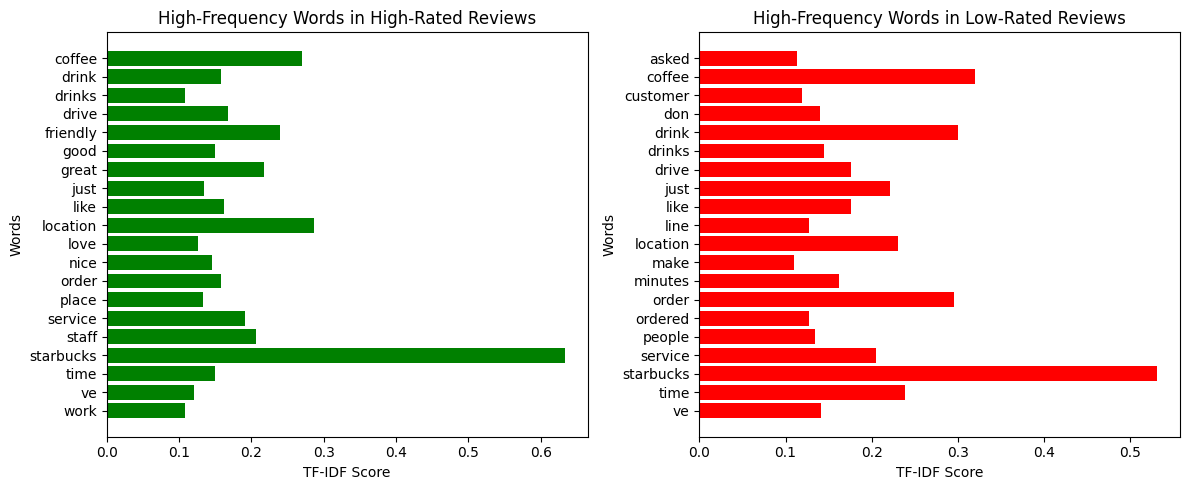

In [62]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Filter high-rated (good) and low-rated (bad) reviews
high_rated_texts = df3[df3['stars_x'] >= 4]['text'].dropna().str.cat(sep=' ')
low_rated_texts = df3[df3['stars_x'] <= 2]['text'].dropna().str.cat(sep=' ')

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)

# Fit and transform high-rated reviews
high_tf_idf = vectorizer.fit_transform([high_rated_texts])
high_keywords = vectorizer.get_feature_names_out()
high_tfidf_scores = high_tf_idf.toarray().flatten()

# Fit and transform low-rated reviews
low_tf_idf = vectorizer.fit_transform([low_rated_texts])
low_keywords = vectorizer.get_feature_names_out()
low_tfidf_scores = low_tf_idf.toarray().flatten()

# Creating separate bar charts for high-rated and low-rated reviews
plt.figure(figsize=(12, 5))

# High-Rated Reviews TF-IDF Scores
plt.subplot(1, 2, 1)
plt.barh(high_keywords, high_tfidf_scores, color='green')
plt.xlabel("TF-IDF Score")
plt.ylabel("Words")
plt.title("High-Frequency Words in High-Rated Reviews")
plt.gca().invert_yaxis()

# Low-Rated Reviews TF-IDF Scores
plt.subplot(1, 2, 2)
plt.barh(low_keywords, low_tfidf_scores, color='red')
plt.xlabel("TF-IDF Score")
plt.ylabel("Words")
plt.title("High-Frequency Words in Low-Rated Reviews")
plt.gca().invert_yaxis()

# Display the graphs
plt.tight_layout()
plt.show()


### **Key Takeaways:**
1. **Common Focus:** *Starbucks, coffee, drink, service, location* appear in both high and low-rated reviews.  
2. **Positive Reviews:** Highlight *friendly, great, love, nice*—praising service and experience.  
3. **Negative Reviews:** Mention *asked, line, minutes, ordered*—indicating frustration with wait times and order issues.  
4. **Conclusion:** Customers appreciate **good service**, while delays, long wait times, and service issues and order mistakes drive negative feedback.
5. Optimizing speed, efficiency, and customer interactions can improve overall ratings.

# Overall Insights and Recommendations

## Recommendations:
1. Identify the policies and procedures in place in high-performing markets regarding cleaning and parking (AZ, MO, LA) to the poor performing markets then begin implementing the policies that the successful markets are using in the struggling markets

2. To accomplish this, we recommend meeting with managers from the high-performing markets to gather the necessary information then put together a support team that can work with managers in struggling markets using this information to ensure that the new policies are being implemented effectively

3. Continue to gather Yelp review data, review scores, and review text to monitor shifts in sentiment and gauge success of policy changes \




##Conclusion:

We believe that this data, our analysis, and recommendations based on our analysis can help Starbucks strengthen its relationship with its customers.

In turn, this will help maintain strong customer loyalty and ultimately help sustain strong profitability.